<a href="https://colab.research.google.com/github/okwasna/dane_wszystkie/blob/main/wersja_ostatnia_15_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [4]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [5]:
#k-means 40-60 co 5,
data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    print(f"\nKMeans dla {n_clusters} klastrów:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)

    df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_

    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")

    silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)

    df_filtered['Silhouette'] = silhouette_values

    cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()

    print(f"Średni wskaźnik Silhouette dla każdego klastra:")
    print(cluster_silhouette_means)

    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
    print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:")
    print(cluster_counts)

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")


KMeans dla 40 klastrów:


<ipython-input-5-19753657d786>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.6730


<ipython-input-5-19753657d786>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.836717
1     0.000000
2    -0.021573
3     0.000000
4     0.000000
5    -0.029876
6     0.000000
7     0.000000
8     0.155425
9     0.000000
10    0.147032
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.085226
17    0.197268
18    0.061358
19   -0.009449
20    0.190431
21    0.139933
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.258949
27    0.305512
28    0.000000
29    0.311178
30    0.291708
31    0.178459
32    0.000000
33    0.000000
34    0.073105
35    0.339696
36    0.000000
37   -0.003339
38    0.077619
39    0.119223
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
0     16200
30     3360
17     1514
39      593
10      245
38      123
31       67
19       34
21       31
5        15
8        12
27        7
16        6
37        4
29        3
20        3
35        3
2         2
34        2
18        2
26        

<ipython-input-5-19753657d786>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 45 klastrów: 0.6465


<ipython-input-5-19753657d786>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_45
0     0.840135
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5    -0.032983
6     0.000000
7     0.000000
8     0.167793
9     0.000000
10    0.134208
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.072719
17    0.167013
18    0.061358
19    0.015996
20    0.180613
21    0.055857
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.223181
27    0.219038
28    0.000000
29    0.293964
30    0.193759
31    0.145986
32    0.000000
33    0.000000
34    0.051474
35    0.279036
36    0.000000
37   -0.023788
38    0.029622
39   -0.013253
40    0.000000
41    0.000000
42    0.153095
43    0.127384
44    0.282563
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 45 klastrów:
Cluster_45
0     15303
44     3429
30     1718
17      813
10      344
43      179
39      148
38      103
31       57
19       44
42       21
21       17
8         9
5         8
27     

<ipython-input-5-19753657d786>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 50 klastrów: 0.6462


<ipython-input-5-19753657d786>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_50
0     0.840379
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.068933
6     0.000000
7     0.000000
8     0.098060
9     0.000000
10    0.131056
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.047084
17    0.164417
18    0.000000
19   -0.019429
20    0.140962
21    0.106701
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.223181
27    0.217219
28    0.000000
29    0.293964
30    0.195289
31    0.206853
32    0.000000
33    0.000000
34    0.051474
35    0.000000
36    0.000000
37   -0.051184
38    0.018872
39   -0.013563
40    0.000000
41    0.000000
42    0.134046
43    0.137557
44    0.281895
45    0.027041
46    0.000000
47    0.000000
48    0.005434
49    0.000000
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 50 klastrów:
Cluster_50
0     15289
44     3433
30     1719
17      820
10      341
43      181
39      147
38      101
31  

<ipython-input-5-19753657d786>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 55 klastrów: 0.6297


<ipython-input-5-19753657d786>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_55
0     0.841501
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.075836
6     0.000000
7     0.000000
8     0.174024
9     0.000000
10    0.130041
11    0.000000
12    0.112900
13    0.000000
14    0.000000
15    0.182797
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.011939
21   -0.007219
22    0.000000
23    0.000000
24    0.136943
25   -0.068926
26    0.154134
27    0.000000
28    0.126076
29    0.000000
30    0.000000
31    0.184669
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.172918
37    0.000000
38    0.000000
39   -0.040966
40    0.000000
41   -0.028551
42    0.000000
43    0.000000
44    0.110841
45    0.283018
46    0.000000
47    0.000000
48    0.261229
49    0.050796
50    0.000000
51    0.000000
52    0.000000
53    0.033930
54   -0.013896
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 55 klastrów:
Cluster_55
0     14768
45     3368
1

<ipython-input-5-19753657d786>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 60 klastrów: 0.6238
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_60
0     0.840209
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.060182
6     0.000000
7     0.000000
8     0.174024
9     0.000000
10    0.088335
11    0.000000
12    0.148508
13    0.000000
14    0.000000
15    0.192352
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000828
21    0.068983
22    0.000000
23    0.000000
24    0.110622
25    0.026817
26    0.156141
27    0.000000
28    0.128711
29    0.000000
30    0.000000
31    0.158288
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.183905
37    0.000000
38    0.000000
39   -0.040431
40    0.000000
41   -0.034625
42    0.000000
43    0.000000
44    0.095103
45    0.277569
46    0.000000
47    0.000000
48    0.273157
49    0.077254
50    0.000000
51    0.000000
52    0.000000
53    0.104767
54   -0.018216
55    0.214300
56   -0.003418
57    0.000000
58    0.153946
59   

<ipython-input-5-19753657d786>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#heatmapyy do poprawy,
#musze miec heatmape dla kazdego klastra kmeans, np dla 40, w tym zeby na osi x byly nazwy myszy, a na osi y nazwy genow(bez tych ostatnich kolumn na osi x co sie dziwne zrobily)
#dowiedziec sie z dbscan czemu jest takie dziwne
#wizualizowac hierarchiczne
#sprawdzic czy na pewno ilsoc genow do heatmap jest odpowiednia
# Minimalna liczba genów w klastrze, aby był wizualizowany
#zwizualizować nasze geny na wykresie 2D np metodą PCA mail od p swiercz
min_genes = 10

# Zakres liczby klastrów (dynamicznie zmieniaj n_clusters)
n_clusters = 40

# Pętla przez wszystkie klastry
for cluster_id in range(n_clusters):
    # Wybieramy geny z konkretnego klastra
    cluster_genes = df_filtered[df_filtered[f'Cluster_{n_clusters}'] == cluster_id]

    # Sprawdzamy, czy liczba genów w klastrze spełnia warunek minimalnej liczebności
    if len(cluster_genes) >= min_genes:
        # Transformacja logarytmiczna danych
        cluster_genes_log = np.log1p(cluster_genes.loc[:, 'SRR7451446':])

        # Obliczenie średniego wskaźnika Silhouette dla klastra
        cluster_silhouette_mean = cluster_genes['Silhouette'].mean()

        # Generowanie mapy ciepła
        plt.figure(figsize=(10, 8))
        #sns.heatmap(cluster_genes_log, cmap="viridis", cbar=True)
        sns.heatmap(cluster_genes_log, cmap="viridis", cbar=True, yticklabels=True)

        # Dodanie tytułu i etykiet
        plt.title(
            f"KMeans ({n_clusters} klastrów): Klaster {cluster_id} "
            f"(n = {len(cluster_genes)}, Silhouette = {cluster_silhouette_mean:.4f})"
        )
        plt.xlabel("Wartości SRR")
        plt.ylabel("Geny")

        # Wyświetlenie mapy
        plt.show()


KeyboardInterrupt: 

In [ ]:
print(df_filtered.head())


            lncRNA        mean            var  coeff of var  SRR7451446  \
Unnamed: 0                                                                
7SK              0    3.762019      21.888072      1.243606    1.357138   
A2M              0   20.267104    1297.462576      1.777279   26.464191   
A2M-AS1          1    5.144518      30.254474      1.069178    0.000000   
A2ML1            0    9.435519     229.189277      1.604469   17.642794   
A4GALT           0  708.942320  269934.529600      0.732855  220.534924   

            SRR7451447  SRR7451449  SRR7451450  SRR7451451  SRR7451452  ...  \
Unnamed: 0                                                              ...   
7SK           1.675025    2.385340    1.672319    3.724756   11.352836  ...   
A2M         179.227647    7.156021    5.853117    9.311891    9.839125  ...   
A2M-AS1       2.512537    7.156021    3.344638    4.655945   11.352836  ...   
A2ML1         0.837512    1.590227    5.016957   17.692592   41.627066  ...   


In [ ]:
cluster_genes = df_filtered[df_filtered[f'Cluster_{n_clusters}'] == cluster_id]

# Sprawdzenie nazw kolumn
print(cluster_genes.columns)


Index(['Unnamed: 0', 'lncRNA', 'mean', 'var', 'coeff of var', 'SRR7451446',
       'SRR7451447', 'SRR7451449', 'SRR7451450', 'SRR7451451', 'SRR7451452',
       'SRR7451453', 'SRR7451454', 'SRR7451455', 'SRR7451456', 'SRR7451457',
       'SRR7451458', 'SRR7451459', 'SRR7451460', 'SRR7451461', 'SRR7451462',
       'SRR7451463', 'SRR7451464', 'SRR7451465', 'SRR7451466', 'SRR7451467',
       'SRR7451468', 'SRR7451469', 'SRR7451470', 'SRR7451471', 'SRR7451472',
       'Cluster_40', 'Silhouette', 'Cluster_30', 'Cluster_35', 'Cluster_45',
       'Cluster_50', 'Agg_Cluster_40', 'DBSCAN_Cluster', 'Cluster_55',
       'Cluster_60'],
      dtype='object')


In [ ]:
print(df_filtered['Unnamed: 0'].head())


0        7SK
3        A2M
4    A2M-AS1
5      A2ML1
7     A4GALT
Name: Unnamed: 0, dtype: object


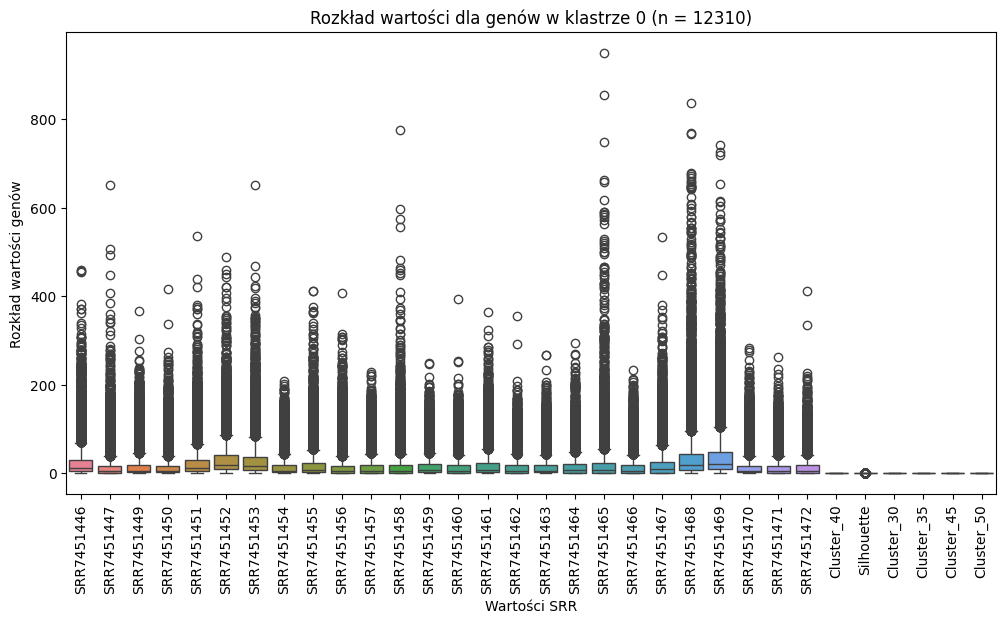

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cluster_0_genes.loc[:, 'SRR7451446':])
plt.title(f"Rozkład wartości dla genów w klastrze 0 (n = {len(cluster_0_genes)})")
plt.xlabel("Wartości SRR")
plt.ylabel("Rozkład wartości genów")
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering = AgglomerativeClustering(n_clusters=40)
agg_labels = agg_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_40'] = agg_labels

agg_silhouette_avg = silhouette_score(data_normalized, agg_labels)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (40 klastrów): {agg_silhouette_avg:.4f}")


agg_cluster_counts = pd.Series(agg_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (40 klastrów):")
print(agg_cluster_counts)


<ipython-input-11-240c6fac1cb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Agg_Cluster_40'] = agg_labels


Średni wskaźnik Silhouette dla Agglomerative Clustering (40 klastrów): 0.6924
Ilość genów w każdym klastrze dla Agglomerative Clustering (40 klastrów):
39    11983
22     2176
14     1950
10     1167
30      924
16      874
26      808
6       706
1       593
7       486
19      245
17      119
28       69
5        41
9        34
27       17
8         9
3         7
13        6
0         5
2         4
12        3
18        3
4         2
33        1
35        1
20        1
21        1
15        1
38        1
34        1
37        1
32        1
11        1
29        1
25        1
24        1
31        1
23        1
36        1
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0    16200
 1     3357
 2     1497
-1      567
 4      505
 3      121
Name: count, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-12-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels
